C:\Users\User\AppData\Local\Temp\ipykernel_35852\1124960155.py:174: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


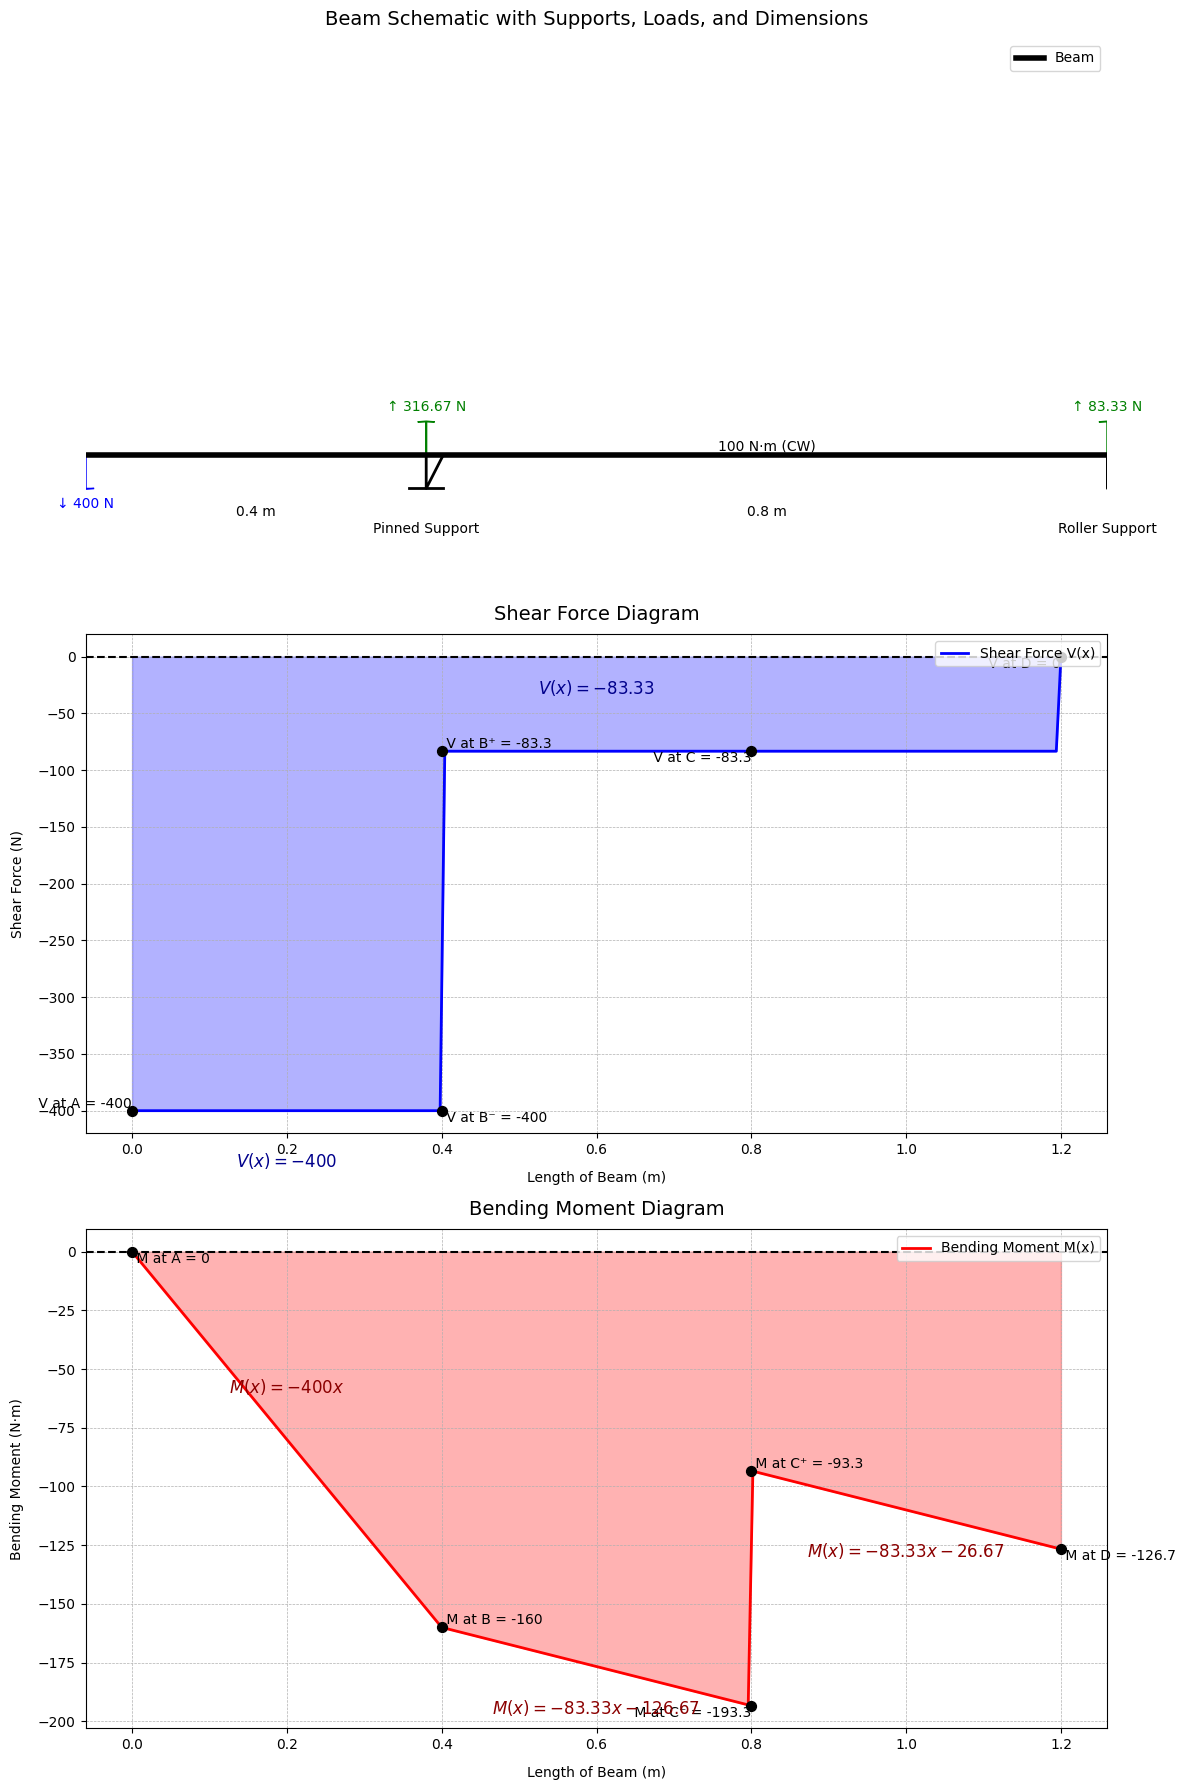

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data (convert to SI units: N and m)
L1 = 0.4  # m (distance from A to B, 400 mm)
L2 = 0.8  # m (distance from B to D, with C at 0.8 m)
L = 1.2   # m (total length of beam, 1,200 mm)
RA = 0    # No reaction at A (support at B and D only)
RB = 316.67  # N (reaction at B, 316.67 N upward, pinned support)
RD = 83.33   # N (reaction at D, 83.33 N upward, roller support)

# Note: The 400 N force is at x = 0, and the 100 N-m moment is at x = 0.8 m.

# Discretized x values along the beam
x = np.linspace(0, L, 200)  # Increased points for smoother plots

# Define the piecewise shear force function:
# For 0 ≤ x < 0.4:  V(x) = -400
# For 0.4 ≤ x < 0.8:  V(x) = -83.33
# For 0.8 ≤ x < 1.2:  V(x) = -83.33
# At x = 1.2:  V(x) = 0
V = np.piecewise(x, [(x < L1), (x >= L1) & (x < 0.8), (x >= 0.8) & (x < 1.2), (x >= 1.2)],
                 [lambda x: -400, 
                  lambda x: -83.33, 
                  lambda x: -83.33, 
                  lambda x: 0])

# Define the piecewise bending moment function:
# For 0 ≤ x < 0.4:  M(x) = -400x
# For 0.4 ≤ x < 0.8:  M(x) = -83.33x - 126.668
# For 0.8 ≤ x < 1.2:  M(x) = -83.33x - 26.668 (after the 100 N-m moment at x = 0.8)
# At x = 1.2:  M(x) = -126.664
M = np.piecewise(x, [(x < L1), (x >= L1) & (x < 0.8), (x >= 0.8) & (x < 1.2), (x >= 1.2)],
                 [lambda x: -400 * x, 
                  lambda x: -83.33 * x - 126.668, 
                  lambda x: -83.33 * x - 26.668, 
                  lambda x: -126.664])

# Create subplots: beam schematic, shear force, then bending moment
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), constrained_layout=True)

# -------------------------
# Beam Schematic
# -------------------------
ax1.set_xlim(0, L)
ax1.set_ylim(-5, 25)
ax1.axis('off')
ax1.set_title("Beam Schematic with Supports, Loads, and Dimensions", pad=10, size=14)

# Draw the beam (horizontal line) with dimensions
ax1.plot([0, 1.2], [0, 0], 'k-', linewidth=4, label="Beam")
# Add dimension labels
ax1.text(0.2, -3, '0.4 m', horizontalalignment='center', verticalalignment='top')
ax1.text(0.8, -3, '0.8 m', horizontalalignment='center', verticalalignment='top')

# Supports (with labels for types)
# Pinned support at B (0.4 m) - triangle with base
ax1.plot([0.4, 0.4, 0.42], [0, -2, 0], 'k-', linewidth=2)  # Triangle
ax1.plot([0.38, 0.42], [-2, -2], 'k-', linewidth=2)  # Base for pinned
ax1.text(0.4, -4, 'Pinned Support', horizontalalignment='center', verticalalignment='top')

# Roller support at D (1.2 m) - triangle
ax1.plot([1.2, 1.2, 1.22], [0, -2, 0], 'k-', linewidth=2)  # Triangle
ax1.text(1.2, -4, 'Roller Support', horizontalalignment='center', verticalalignment='top')

# Point load at A (0 m)
ax1.arrow(0, 0, 0, -2, head_width=0.02, head_length=0.04, fc='blue', ec='blue')
ax1.text(0, -2.5, '↓ 400 N', horizontalalignment='center', verticalalignment='top', color='blue')

# Moment at C (0.8 m) - curved arrow
ax1.plot([0.78, 0.82], [0.02, 0.02], 'k-', linewidth=2)
ax1.plot([0.82, 0.8], [0.02, 0.06], 'k-', linewidth=2)
ax1.plot([0.8, 0.78], [0.06, 0.02], 'k-', linewidth=2)
ax1.text(0.8, 0.1, '100 N·m (CW)', horizontalalignment='center', verticalalignment='bottom')

# Reactions (upward arrows)
ax1.arrow(0.4, 0, 0, 2, head_width=0.02, head_length=0.04, fc='green', ec='green')
ax1.text(0.4, 2.5, f'↑ {RB:.2f} N', horizontalalignment='center', verticalalignment='bottom', color='green')
ax1.arrow(1.2, 0, 0, 2, head_width=0.02, head_length=0.04, fc='green', ec='green')
ax1.text(1.2, 2.5, f'↑ {RD:.2f} N', horizontalalignment='center', verticalalignment='bottom', color='green')

ax1.legend()

# -------------------------
# Shear Force Diagram
# -------------------------
ax2.plot(x, V, label="Shear Force V(x)", color='blue', linewidth=2)
ax2.fill_between(x, V, where=(V >= 0), color='blue', alpha=0.3, interpolate=True)
ax2.fill_between(x, V, where=(V < 0), color='blue', alpha=0.3, interpolate=True)
ax2.axhline(0, color='black', linewidth=1.5, linestyle='--')
ax2.set_title("Shear Force Diagram", pad=10, size=14)
ax2.set_xlabel("Length of Beam (m)", labelpad=10)
ax2.set_ylabel("Shear Force (N)", labelpad=10)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')

# Key shear values at supports (A, B, C, D)
V_A = -400  # at x = 0
V_B_left = -400  # just before x = 0.4
V_B_right = -83.33  # just after x = 0.4
V_C = -83.33  # at x = 0.8
V_D = 0  # at x = 1.2

# Mark key points for shear (noting the jump at B)
ax2.scatter([0, 0.4, 0.4, 0.8, 1.2], [V_A, V_B_left, V_B_right, V_C, V_D], color='black', zorder=5, s=50)
ax2.text(0, V_A, " V at A = -400", verticalalignment='bottom', horizontalalignment='right')
ax2.text(0.4, V_B_left, " V at B⁻ = -400", verticalalignment='top', horizontalalignment='left')
ax2.text(0.4, V_B_right, " V at B⁺ = -83.3", verticalalignment='bottom', horizontalalignment='left')
ax2.text(0.8, V_C, " V at C = -83.3", verticalalignment='top', horizontalalignment='right')
ax2.text(1.2, V_D, " V at D = 0", verticalalignment='top', horizontalalignment='right')

# Annotate the shear equations on each segment
# For 0 ≤ x < 0.4, at x = 0.2
x_poly1_s = 0.2
V_poly1 = -400  # Constant
ax2.text(x_poly1_s, V_poly1 - 50, r'$V(x)=-400$', 
         horizontalalignment='center', fontsize=12, color='darkblue')

# For 0.4 ≤ x < 1.2, at x = 0.6
x_poly2_s = 0.6
V_poly2 = -83.33  # Constant
ax2.text(x_poly2_s, V_poly2 + 50, r'$V(x)=-83.33$', 
         horizontalalignment='center', fontsize=12, color='darkblue')

# For x = 1.2, we already marked it as V = 0

# -------------------------
# Bending Moment Diagram
# -------------------------
ax3.plot(x, M, label="Bending Moment M(x)", color='red', linewidth=2)
ax3.fill_between(x, M, where=(M >= 0), color='red', alpha=0.3, interpolate=True)
ax3.fill_between(x, M, where=(M < 0), color='red', alpha=0.3, interpolate=True)
ax3.axhline(0, color='black', linewidth=1.5, linestyle='--')
ax3.set_title("Bending Moment Diagram", pad=10, size=14)
ax3.set_xlabel("Length of Beam (m)", labelpad=10)
ax3.set_ylabel("Bending Moment (N·m)", labelpad=10)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.legend(loc='upper right')

# Key moment values at supports (A, B, C, D)
M_A = 0  # at x = 0
M_B = -160  # at x = 0.4
M_C_before = -193.332  # just before x = 0.8
M_C_after = -93.332  # just after x = 0.8 (after 100 N-m moment)
M_D = -126.664  # at x = 1.2

# Mark key points for moment (noting the jump at C)
ax3.scatter([0, 0.4, 0.8, 0.8, 1.2], [M_A, M_B, M_C_before, M_C_after, M_D], color='black', zorder=5, s=50)
ax3.text(0, M_A, " M at A = 0", verticalalignment='top')
ax3.text(0.4, M_B, " M at B = -160", verticalalignment='bottom')
ax3.text(0.8, M_C_before, " M at C⁻ = -193.3", verticalalignment='top', horizontalalignment='right')
ax3.text(0.8, M_C_after, " M at C⁺ = -93.3", verticalalignment='bottom', horizontalalignment='left')
ax3.text(1.2, M_D, " M at D = -126.7", verticalalignment='top')

# Annotate the moment equations on each segment
# For 0 ≤ x < 0.4, at x = 0.2
x_poly1 = 0.2
M_poly1 = -400 * x_poly1  # -400 * 0.2 = -80
ax3.text(x_poly1, M_poly1 + 20, r'$M(x)=-400x$', 
         horizontalalignment='center', fontsize=12, color='darkred')

# For 0.4 ≤ x < 0.8, at x = 0.6
x_poly2 = 0.6
M_poly2 = -83.33 * x_poly2 - 126.668  # -83.33 * 0.6 - 126.668 = -137.604
ax3.text(x_poly2, M_poly2 - 20, r'$M(x)=-83.33x-126.67$', 
         horizontalalignment='center', fontsize=12, color='darkred')

# For 0.8 ≤ x < 1.2, at x = 1.0
x_poly3 = 1.0
M_poly3 = -83.33 * x_poly3 - 26.668  # -83.33 * 1.0 - 26.668 = -110.0
ax3.text(x_poly3, M_poly3 - 20, r'$M(x)=-83.33x-26.67$', 
         horizontalalignment='center', fontsize=12, color='darkred')

plt.tight_layout()
plt.show()